<h1><center>HW 3: Build Twitter Networks</center></h1>

### Q1. Scrape the follower-followee network by companies. (5 points)
    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies. 
    * The input will be a list of Twitter screen names. 
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep. 


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
import datetime
import time


In [2]:
CONSUMER_KEY=''
CONSUMER_SECRET=''
ACCESS_KEY=''
ACCESS_SECRET=''

In [3]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
def get_follow(accounts):
    global api
    tb = pd.DataFrame(False, index=accounts, columns=accounts)
    for x, i in enumerate(accounts[:-1]):
        for j in accounts[x+1:]:
            if i!=j:
                tb[i][j], tb[j][i] = list(map(api.get_friendship(source_screen_name = i, target_screen_name = j)[0].__dict__.get, ['following','followed_by']))

    return tb

In [5]:
# test the function with the list of accounts

accounts=['walmart',
 'tysonfoods',
 'godaddy',
 'republicservice',
 'firstsolar',
 'taylor_morrison',
 'onsemi',
 'fm_fcx',
 'amkortechnology',
 'magellanhealth',
 'edwardslifesci',
 'visa',
 'cbre',
 'smartfinal',
 'google',
 'waltdisneyco',
 'atvi_ab',
 'ebay',
 'intuit',
 'edisonintl']

df = get_follow(accounts)
df

Rate limit reached. Sleeping for: 868


,walmart,tysonfoods,godaddy,republicservice,firstsolar,taylor_morrison,onsemi,fm_fcx,amkortechnology,magellanhealth,edwardslifesci,visa,cbre,smartfinal,google,waltdisneyco,atvi_ab,ebay,intuit,edisonintl
walmart,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tysonfoods,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
godaddy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
republicservice,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
firstsolar,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
taylor_morrison,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
onsemi,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
fm_fcx,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
amkortechnology,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
magellanhealth,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Q2. Build a directed network with the data you just scraped. (5 points)
    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the indegree centrality and structural hole (you can use constraint). 
    * Sort these nodes by indegree centrality and print the top one account.
    * Sort these nodes by structural hole and print the top one account. 
    * Note the NA values in constraint measures. Also note the relation between structural hole and constraint.

,walmart,tysonfoods,godaddy,republicservice,firstsolar,taylor_morrison,onsemi,fm_fcx,amkortechnology,magellanhealth,edwardslifesci,visa,cbre,smartfinal,google,waltdisneyco,atvi_ab,ebay,intuit,edisonintl
walmart,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tysonfoods,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
godaddy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
republicservice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
firstsolar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
taylor_morrison,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
onsemi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fm_fcx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amkortechnology,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magellanhealth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'The follower-followee network of Fortune Companies')

(-0.9883826579480038,
 1.1889413385380456,
 -1.147191254797455,
 1.075170148840195)

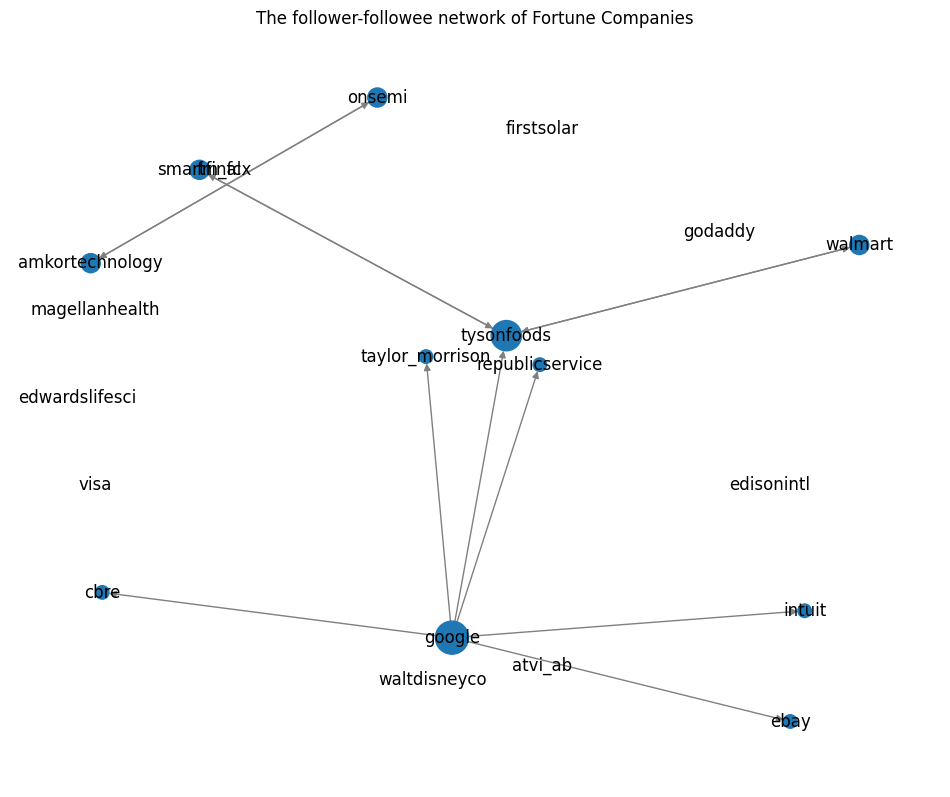

In [6]:
# Build a network from the adjacency matrix
df.astype('float')
G = nx.convert_matrix.from_pandas_adjacency(df.astype(float), create_using=nx.DiGraph)

# Visualize
figure(figsize=(12,10), dpi=100)
node_size = [x*1800 for x in nx.degree_centrality(G).values()]
pos = nx.kamada_kawai_layout(G)
edge_color = "grey"
arrowsize = 20

nx.drawing.nx_pylab.draw_networkx(G, pos=pos, node_size=node_size, edge_color=edge_color)

plt.title('The follower-followee network of Fortune Companies')
plt.axis("off") 
plt.show()

In [9]:
# calculate centrality and constraint
constraint = {i:j for i,j in nx.algorithms.structuralholes.constraint(G).items() if j>0}
constraint
constraint = sorted(constraint.items(), key= lambda x: x[1])
indegreeCentrality = sorted(nx.algorithms.centrality.in_degree_centrality(G).items(), key=lambda x:x[1], reverse=True)
print(indegreeCentrality[0][0])
print(constraint[0][0])

{'walmart': 1.0,
 'tysonfoods': 0.3600000000000001,
 'onsemi': 1.0,
 'amkortechnology': 1.0,
 'smartfinal': 1.0,
 'google': 0.16666666666666669}

tysonfoods
google


### Bonus question: (3 points)
 * Define a functionn to scrape the most recent (the recent week, but you can go beyond a bit if in one call you get a few) **original tweets** (exclude retweets) from multiple accouts. This function will take a list of screen names as input.
 * For each tweet, grab "id","created_at","full_text","user.screen_name".
 * Make a dataframe and return the dataframe.
 * Use the function to get the original tweets of the top twp accounts from Q2. 


In [8]:
def get_all_tweets(user_names):
    global api
    tweetData = {"Id":[], "Created at": [], "Full text": [], "User Screen Name":[]}
    
    for user in user_names:
        publicTweets = api.user_timeline(screen_name=user)
        for tweet in publicTweets:
            if not tweet.retweeted:
                tweetData["Id"].append(tweet.id)
                tweetData["Created at"].append(tweet.created_at)
                tweetData["Full text"].append(tweet.text)
                tweetData['User Screen Name'].append(tweet.user.screen_name)
    
    df = pd.DataFrame(tweetData)
    return df

users=[]

if __name__ == '__main__': 
    get_all_tweets(accounts) 
        


,Id,Created at,Full text,User Screen Name
0,1454796910452252673,2021-10-31 13:06:26+00:00,"@Ploffzu We are doing great, how about yoursel...",Walmart
1,1454790667964751876,2021-10-31 12:41:38+00:00,@HealthAlfredo We are glad to help! 👍,Walmart
2,1454784113450364928,2021-10-31 12:15:35+00:00,@sah_vvy Yum! You're making our mouths water! 😋,Walmart
3,1454772677722492933,2021-10-31 11:30:09+00:00,@melaniejailene 😊🙌,Walmart
4,1454772652585934850,2021-10-31 11:30:03+00:00,"@Hermitius_ What's your favorite scent, Sophia?",Walmart
...,...,...,...,...
395,1441531435731468291,2021-09-24 22:34:11+00:00,RT @theclimatereg: Did you know? For #Californ...,edisonintl
396,1441090136662368260,2021-09-23 17:20:37+00:00,RT @Edison_Electric: “We must work together to...,edisonintl
397,1441050983530995731,2021-09-23 14:45:02+00:00,Achieving a #cleanenergy future means all hand...,edisonintl
398,1440872119282245635,2021-09-23 02:54:18+00:00,“There’s no doubt California can reach its goa...,edisonintl
